In [25]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd 

# Data Visualization Libraries
import matplotlib.pyplot as plt 
import seaborn as sns 

# Machine Learning Libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.preprocessing import PolynomialFeatures

In [27]:
df = pd.read_csv(r"H:\Programming\Dataset\Machine Learning\Weight-Height Polynomial Dataset.csv")
df.head()

,Weight,Height
0,69.963210,96.644532
1,116.057145,196.156340
2,98.559515,145.862047
3,87.892679,121.157923
4,52.481491,68.971292


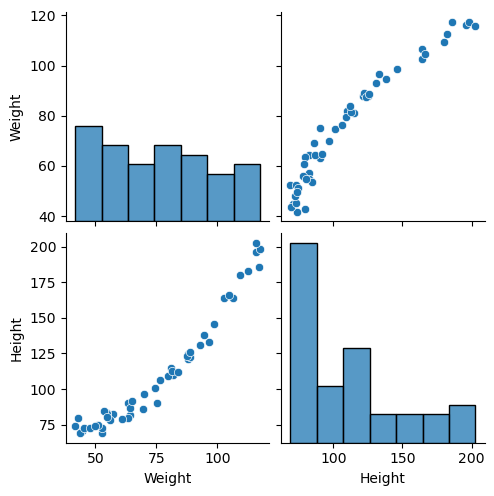

In [28]:
# Pairplot
sns.pairplot(df)
plt.show()

In [63]:
# Data Split 
x = df.drop(columns='Height')
y = df['Height']

In [65]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)


PolynomialFeatures()

In [67]:
x = pf.transform(x)

In [69]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, random_state=42
)


In [71]:
# Train Model
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [73]:
# Accuracy on test data
print(f"Accuracy: {lr.score(x_test, y_test)*100:.2f}%")

Accuracy: 97.18%


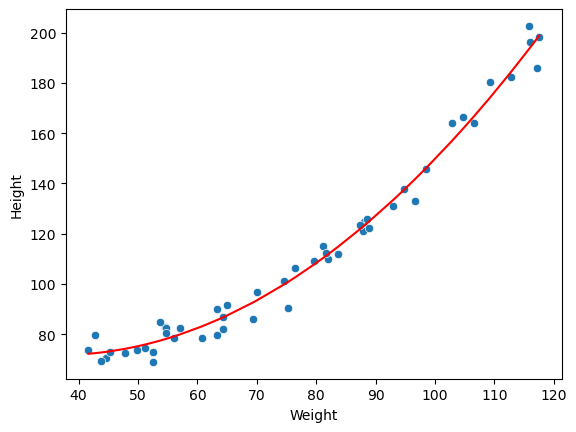

In [75]:
feature_cols = df.drop(columns='Height').columns

# ==============================
 # Smooth Curve for Visualization
# ==============================
df_sorted = df.sort_values(by='Weight')

# Use saved feature names — NOT x.columns
x_sorted = df_sorted[feature_cols]

x_sorted_poly = pf.transform(x_sorted)
y_pred_sorted = lr.predict(x_sorted_poly)

# ==============================
 # Plot
# ==============================
sns.scatterplot(x='Weight', y='Height', data=df)
plt.plot(df_sorted['Weight'], y_pred_sorted, color='red')
plt.show()

# All in One

Accuracy: 97.18%


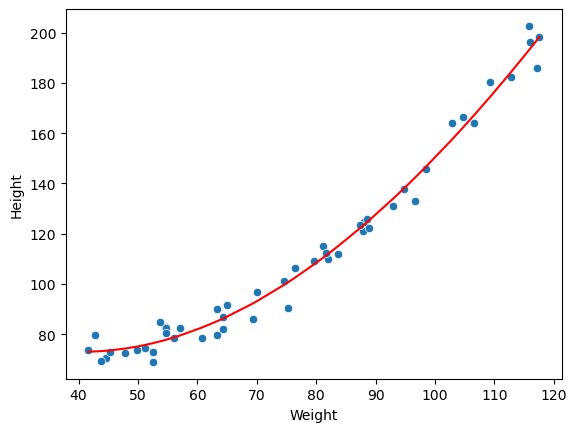

In [12]:
# ==============================
# 1) Features & Target
# ==============================
x = df.iloc[:, :-1]      # all features
y = df['Height']         # target example

# SAVE FEATURE NAMES BEFORE ANY TRANSFORMATION
feature_cols = x.columns

# ==============================
# 2) Train–Test Split
# ==============================
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, random_state=42
)

# ==============================
# 3) Polynomial Features
# ==============================
pf = PolynomialFeatures(degree=3)

x_train_poly = pf.fit_transform(x_train)
x_test_poly = pf.transform(x_test)

# ==============================
# 4) Train Model
# ==============================
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

# Accuracy on test data
print(f"Accuracy: {lr.score(x_test_poly, y_test)*100:.2f}%")
# ==============================
# 5) Smooth Curve for Visualization
# ==============================
df_sorted = df.sort_values(by='Weight')

# Use saved feature names — NOT x.columns
x_sorted = df_sorted[feature_cols]

x_sorted_poly = pf.transform(x_sorted)
y_pred_sorted = lr.predict(x_sorted_poly)

# ==============================
# 6) Plot
# ==============================
sns.scatterplot(x='Weight', y='Height', data=df)
plt.plot(df_sorted['Weight'], y_pred_sorted, color='red')
plt.show()
